In [16]:
# similar to:  https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [6]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


In [7]:
training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data", train=False, download=True, transform=ToTensor()
)


train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


In [8]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(
        f"\n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

In [9]:

# model initialization
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.05 # to make the model converge faster
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 35


In [13]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print('Done!')

Epoch 1
-------------------------------
loss: 2.298847  [   64/60000]
loss: 1.536941  [ 6464/60000]
loss: 0.560022  [12864/60000]
loss: 0.409896  [19264/60000]
loss: 0.470079  [25664/60000]
loss: 0.347766  [32064/60000]
loss: 0.424074  [38464/60000]
loss: 0.268754  [44864/60000]
loss: 0.180883  [51264/60000]
loss: 0.159479  [57664/60000]
Test Error: 
 Accuracy: 91.3%, Avg loss: 0.295276 

Epoch 2
-------------------------------
loss: 0.264557  [   64/60000]
loss: 0.179156  [ 6464/60000]
loss: 0.201183  [12864/60000]
loss: 0.190053  [19264/60000]
loss: 0.230725  [25664/60000]
loss: 0.152161  [32064/60000]
loss: 0.238925  [38464/60000]
loss: 0.170505  [44864/60000]
loss: 0.185057  [51264/60000]
loss: 0.265849  [57664/60000]
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.214935 

Epoch 3
-------------------------------
loss: 0.348719  [   64/60000]
loss: 0.204187  [ 6464/60000]
loss: 0.152118  [12864/60000]
loss: 0.294435  [19264/60000]
loss: 0.242475  [25664/60000]
loss: 0.393543  [32064/600

In [15]:
torch.save(model.state_dict(), "./model/model_weights.pth")

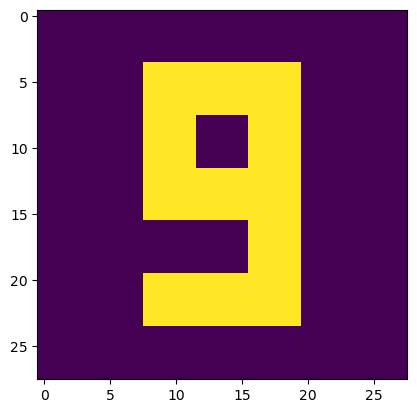

In [19]:
import numpy as np
import  matplotlib.pyplot as plt
x = torch.tensor([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])

# upscale to 28x28
x = torch.kron(x, torch.ones((4, 4)))

plt.imshow(x)

In [23]:
model = NeuralNetwork()

model.load_state_dict(torch.load('./model/model_weights.pth'))

x = x.flatten() / 255.0
x = x.view(1, 784)
pred = model(x)

torch.argmax(pred)

tensor(5)

In [32]:
# testing

from PIL import Image
import torch
import numpy as np

img = Image.open("./testdata/three.png").resize((28, 28)).convert("L")
img_tensor = torch.tensor(np.array(img))


# upscale to 28x28

flat_img = img_tensor.flatten() / 255.0
input_img = flat_img.view(-1, 784)

model = NeuralNetwork()
model.load_state_dict(torch.load("./model/model_weights.pth"))

pred = model(input_img)
print(f"Prediction = {pred.argmax().item()}")


Prediction = 8
